# Feature Engineering and Modelling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
booking_data = pd.read_csv(r"C:\Users\HP\Downloads\customer_booking.csv",encoding="ISO-8859-1")
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


---

##  Feature engineering

### total_trip_duration(in hours)
The sum of the length_of_stay and flight_duration columns would yield the overall trip duration, encompassing the duration of stay at the destination and the time spent flying

In [3]:
#first convert length_of_stay to hours
booking_data['length_of_stay'] = booking_data['length_of_stay'] * 24

#then add the two columns
booking_data['total_trip_duration'] = booking_data['length_of_stay'] + booking_data['flight_duration']
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52


### booking_time_of_day
To determine if booking behavior varies significantly by time of day, one could extract the flight_hour column's time of day (e.g., morning, afternoon, evening). This information could be a valuable feature for analysis purposes.


In [4]:
#extract the time of day from the flight_hour column
booking_data['flight_time_of_day'] = booking_data['flight_hour'].apply(lambda x: 'morning' if x < 12 else 'afternoon' if x < 17 else 'evening' if x < 21 else 'night')
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon


### flight_weekend
By extracting the flight_day column's data on weekends (Saturday or Sunday), it's possible to determine whether a flight occurs on a weekend. This feature could prove valuable if booking patterns differ significantly between weekday and weekend flights.

In [5]:
#extract whether the flight is on a weekend from the flight_day column
booking_data['flight_weekend'] = booking_data['flight_day'].apply(lambda x: "weekend" if x in ["Sun","Sat"] else "weekday")
booking_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend
49996,1,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend
49997,1,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend
49998,1,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday


### origin_destination
By merging the route column with the booking_origin column, it's possible to create a useful feature that takes into account how booking patterns might differ based on the origin and destination of the flight.

In [6]:
#combine the route and booking_origin columns
booking_data['origin_destination'] = booking_data['route'] + " " + booking_data['booking_origin']
booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India


### extras
If any of the wants_extra_baggage, wants_preferred_seat, or wants_in_flight_meals options are selected, a new column named "extras" could be created by combining them. This feature could be valuable if booking patterns significantly differ based on the availability of extra amenities.

In [7]:
#concatenate the wants_extra_baggage, wants_preferred_seat, and wants_in_flight_meals columns
booking_data['extras'] = booking_data['wants_extra_baggage'] | booking_data['wants_preferred_seat'] | booking_data['wants_in_flight_meals']
booking_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand,1
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand,0
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India,1
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand,1
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend,PERPNH Australia,1
49996,1,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend,PERPNH Australia,0
49997,1,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend,PERPNH Australia,1
49998,1,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday,PERPNH Australia,1


### trip_complexity
By merging the trip_type and num_passengers columns, one could obtain a feature that could be valuable in identifying whether booking patterns differ based on the intricacy of the trip. For instance, booking a round trip for a sizable group may entail greater complexity than booking a one-way trip for an individual.

In [8]:
#combine the trip_type and num_passengers columns
booking_data['trip_complexity'] = booking_data['trip_type'] + " " + booking_data['num_passengers'].astype(str)
booking_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras,trip_complexity
0,2,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 2
1,1,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand,0,RoundTrip 1
2,2,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India,1,RoundTrip 2
3,1,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 1
4,2,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India,1,RoundTrip 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend,PERPNH Australia,1,RoundTrip 2
49996,1,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend,PERPNH Australia,0,RoundTrip 1
49997,1,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend,PERPNH Australia,1,RoundTrip 1
49998,1,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday,PERPNH Australia,1,RoundTrip 1


In [9]:
booking_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,extras
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,1.591240,84.940480,553.069440,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560,560.347001,0.79090
std,1.020165,90.451378,813.304081,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643,813.516760,0.40667
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000,4.670000,0.00000
25%,1.000000,21.000000,120.000000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000,126.420000,1.00000
50%,1.000000,51.000000,408.000000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000,413.620000,1.00000
75%,2.000000,115.000000,672.000000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000,680.830000,1.00000
max,9.000000,867.000000,18672.000000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000,18680.830000,1.00000


To enable a predictive model to process data, categorical values must be converted into numerical representations in a way that is both concise and distinctive. The most straightforward approach is to assign each category a numerical label (label encoding), but this method may not be suitable since it implies an inherent order among the categories, even when there is none.

Alternatively, categorical features can be encoded using dummy variables (one-hot encoding), which creates a new feature for every unique value of the categorical column. These new columns are filled with either 1 or 0 to indicate whether a data point belongs to a particular category or not.
#### num_passengers

In [10]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.num_passengers.value_counts())}")

# create a label encoder for each categorical column
label_num_passengers = LabelEncoder()

# fit and transform the categorical columns
booking_data['num_passengers'] = label_num_passengers.fit_transform(booking_data['num_passengers'])
booking_data

Number of unique categories: 9


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras,trip_complexity
0,1,Internet,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 2
1,0,Internet,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand,0,RoundTrip 1
2,1,Internet,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India,1,RoundTrip 2
3,0,Internet,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 1
4,1,Internet,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India,1,RoundTrip 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,Internet,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend,PERPNH Australia,1,RoundTrip 2
49996,0,Internet,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend,PERPNH Australia,0,RoundTrip 1
49997,0,Internet,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend,PERPNH Australia,1,RoundTrip 1
49998,0,Internet,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday,PERPNH Australia,1,RoundTrip 1


#### sales_channel
We apply a basic binary encoding to assign values to each category. To illustrate, if a row has "sales_channel" set to "Internet", it would receive a value of 1, while a row with "sales_channel" set to "Mobile" would get a value of 0.

In [11]:
# Transform into categorical type
booking_data.sales_channel = booking_data.sales_channel.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.sales_channel.value_counts())}")

booking_data['sales_channel'] = booking_data['sales_channel'].replace(['Internet', 'Mobile'], [1, 0])
booking_data

Number of unique categories: 2


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras,trip_complexity
0,1,1,RoundTrip,262,456,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,461.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 2
1,0,1,RoundTrip,112,480,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,485.52,morning,weekend,AKLDEL New Zealand,0,RoundTrip 1
2,1,1,RoundTrip,243,528,17,Wed,AKLDEL,India,1,1,0,5.52,0,533.52,evening,weekday,AKLDEL India,1,RoundTrip 2
3,0,1,RoundTrip,96,744,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,749.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 1
4,1,1,RoundTrip,68,528,15,Wed,AKLDEL,India,1,0,1,5.52,0,533.52,afternoon,weekday,AKLDEL India,1,RoundTrip 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,RoundTrip,27,144,9,Sat,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekend,PERPNH Australia,1,RoundTrip 2
49996,0,1,RoundTrip,111,144,4,Sun,PERPNH,Australia,0,0,0,5.62,0,149.62,morning,weekend,PERPNH Australia,0,RoundTrip 1
49997,0,1,RoundTrip,24,144,22,Sat,PERPNH,Australia,0,0,1,5.62,0,149.62,night,weekend,PERPNH Australia,1,RoundTrip 1
49998,0,1,RoundTrip,15,144,11,Mon,PERPNH,Australia,1,0,1,5.62,0,149.62,morning,weekday,PERPNH Australia,1,RoundTrip 1


#### trip_type

In [12]:
# Transform into categorical type
booking_data.trip_type = booking_data.trip_type.astype("category")

# Checking how many values each unique column holds
print(f"Number of unique categories: {len(booking_data.trip_type.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["trip_type"])
booking_data

Number of unique categories: 3


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,...,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras,trip_complexity,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,1,1,262,456,7,Sat,AKLDEL,New Zealand,1,0,...,0,461.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 2,0,0,1
1,0,1,112,480,3,Sat,AKLDEL,New Zealand,0,0,...,0,485.52,morning,weekend,AKLDEL New Zealand,0,RoundTrip 1,0,0,1
2,1,1,243,528,17,Wed,AKLDEL,India,1,1,...,0,533.52,evening,weekday,AKLDEL India,1,RoundTrip 2,0,0,1
3,0,1,96,744,4,Sat,AKLDEL,New Zealand,0,0,...,0,749.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 1,0,0,1
4,1,1,68,528,15,Wed,AKLDEL,India,1,0,...,0,533.52,afternoon,weekday,AKLDEL India,1,RoundTrip 2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,Sat,PERPNH,Australia,1,0,...,0,149.62,morning,weekend,PERPNH Australia,1,RoundTrip 2,0,0,1
49996,0,1,111,144,4,Sun,PERPNH,Australia,0,0,...,0,149.62,morning,weekend,PERPNH Australia,0,RoundTrip 1,0,0,1
49997,0,1,24,144,22,Sat,PERPNH,Australia,0,0,...,0,149.62,night,weekend,PERPNH Australia,1,RoundTrip 1,0,0,1
49998,0,1,15,144,11,Mon,PERPNH,Australia,1,0,...,0,149.62,morning,weekday,PERPNH Australia,1,RoundTrip 1,0,0,1


#### flight_day

In [13]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_day.value_counts())}")

# create a label encoder for each categorical column
label_flight_day = LabelEncoder()

# fit and transform the categorical columns
booking_data['flight_day'] = label_flight_day.fit_transform(booking_data['flight_day'])
booking_data

Number of unique categories: 7


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,...,booking_complete,total_trip_duration,flight_time_of_day,flight_weekend,origin_destination,extras,trip_complexity,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,1,1,262,456,7,2,AKLDEL,New Zealand,1,0,...,0,461.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 2,0,0,1
1,0,1,112,480,3,2,AKLDEL,New Zealand,0,0,...,0,485.52,morning,weekend,AKLDEL New Zealand,0,RoundTrip 1,0,0,1
2,1,1,243,528,17,6,AKLDEL,India,1,1,...,0,533.52,evening,weekday,AKLDEL India,1,RoundTrip 2,0,0,1
3,0,1,96,744,4,2,AKLDEL,New Zealand,0,0,...,0,749.52,morning,weekend,AKLDEL New Zealand,1,RoundTrip 1,0,0,1
4,1,1,68,528,15,6,AKLDEL,India,1,0,...,0,533.52,afternoon,weekday,AKLDEL India,1,RoundTrip 2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,PERPNH,Australia,1,0,...,0,149.62,morning,weekend,PERPNH Australia,1,RoundTrip 2,0,0,1
49996,0,1,111,144,4,3,PERPNH,Australia,0,0,...,0,149.62,morning,weekend,PERPNH Australia,0,RoundTrip 1,0,0,1
49997,0,1,24,144,22,2,PERPNH,Australia,0,0,...,0,149.62,night,weekend,PERPNH Australia,1,RoundTrip 1,0,0,1
49998,0,1,15,144,11,1,PERPNH,Australia,1,0,...,0,149.62,morning,weekday,PERPNH Australia,1,RoundTrip 1,0,0,1


#### route

In [14]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 208

# Count the number of occurrences of each category
counts = booking_data['route'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['route'] = booking_data['route'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['route'])
booking_data

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,route_OOLSGN,route_Other,route_PENPER,route_PENPVG,route_PENSYD,route_PENTPE,route_PERPNH,route_PERSGN,route_PERTPE,route_SGNSYD
0,1,1,262,456,7,2,New Zealand,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,112,480,3,2,New Zealand,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,243,528,17,6,India,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,96,744,4,2,New Zealand,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,68,528,15,6,India,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,Australia,1,0,1,...,0,0,0,0,0,0,1,0,0,0
49996,0,1,111,144,4,3,Australia,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49997,0,1,24,144,22,2,Australia,0,0,1,...,0,0,0,0,0,0,1,0,0,0
49998,0,1,15,144,11,1,Australia,1,0,1,...,0,0,0,0,0,0,1,0,0,0


#### booking_origin

In [15]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 1044

# Count the number of occurrences of each category
counts = booking_data['booking_origin'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['booking_origin'] = booking_data['booking_origin'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['booking_origin'])
booking_data

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_India,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_New Zealand,booking_origin_Other,booking_origin_Singapore,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
0,1,1,262,456,7,2,1,0,0,5.52,...,0,0,0,0,1,0,0,0,0,0
1,0,1,112,480,3,2,0,0,0,5.52,...,0,0,0,0,1,0,0,0,0,0
2,1,1,243,528,17,6,1,1,0,5.52,...,1,0,0,0,0,0,0,0,0,0
3,0,1,96,744,4,2,0,0,1,5.52,...,0,0,0,0,1,0,0,0,0,0
4,1,1,68,528,15,6,1,0,1,5.52,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,1,0,1,5.62,...,0,0,0,0,0,0,0,0,0,0
49996,0,1,111,144,4,3,0,0,0,5.62,...,0,0,0,0,0,0,0,0,0,0
49997,0,1,24,144,22,2,0,0,1,5.62,...,0,0,0,0,0,0,0,0,0,0
49998,0,1,15,144,11,1,1,0,1,5.62,...,0,0,0,0,0,0,0,0,0,0


#### flight_duration

In [16]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_duration.value_counts())}")

# create a label encoder for each categorical column
label_flight_duration = LabelEncoder()

# fit and transform the categorical columns
booking_data['flight_duration'] = label_flight_duration.fit_transform(booking_data['flight_duration'])
booking_data

Number of unique categories: 21


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_India,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_New Zealand,booking_origin_Other,booking_origin_Singapore,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
0,1,1,262,456,7,2,1,0,0,8,...,0,0,0,0,1,0,0,0,0,0
1,0,1,112,480,3,2,0,0,0,8,...,0,0,0,0,1,0,0,0,0,0
2,1,1,243,528,17,6,1,1,0,8,...,1,0,0,0,0,0,0,0,0,0
3,0,1,96,744,4,2,0,0,1,8,...,0,0,0,0,1,0,0,0,0,0
4,1,1,68,528,15,6,1,0,1,8,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
49996,0,1,111,144,4,3,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
49997,0,1,24,144,22,2,0,0,1,9,...,0,0,0,0,0,0,0,0,0,0
49998,0,1,15,144,11,1,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0


#### flight_time_of_day

In [17]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_time_of_day.value_counts())}")

# create a label encoder for each categorical column
label_flight_time_of_day = LabelEncoder()

# fit and transform the categorical columns
booking_data['flight_time_of_day'] = label_flight_time_of_day.fit_transform(booking_data['flight_time_of_day'])
booking_data

Number of unique categories: 4


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_India,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_New Zealand,booking_origin_Other,booking_origin_Singapore,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
0,1,1,262,456,7,2,1,0,0,8,...,0,0,0,0,1,0,0,0,0,0
1,0,1,112,480,3,2,0,0,0,8,...,0,0,0,0,1,0,0,0,0,0
2,1,1,243,528,17,6,1,1,0,8,...,1,0,0,0,0,0,0,0,0,0
3,0,1,96,744,4,2,0,0,1,8,...,0,0,0,0,1,0,0,0,0,0
4,1,1,68,528,15,6,1,0,1,8,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0
49996,0,1,111,144,4,3,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
49997,0,1,24,144,22,2,0,0,1,9,...,0,0,0,0,0,0,0,0,0,0
49998,0,1,15,144,11,1,1,0,1,9,...,0,0,0,0,0,0,0,0,0,0


#### flight_weekend

In [18]:
# Transform into categorical type
booking_data.flight_weekend = booking_data.flight_weekend.astype("category")

# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_weekend.value_counts())}")

booking_data = pd.get_dummies(booking_data,columns=["flight_weekend"])
booking_data

Number of unique categories: 2


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_Japan,booking_origin_Malaysia,booking_origin_New Zealand,booking_origin_Other,booking_origin_Singapore,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand,flight_weekend_weekday,flight_weekend_weekend
0,1,1,262,456,7,2,1,0,0,8,...,0,0,1,0,0,0,0,0,0,1
1,0,1,112,480,3,2,0,0,0,8,...,0,0,1,0,0,0,0,0,0,1
2,1,1,243,528,17,6,1,1,0,8,...,0,0,0,0,0,0,0,0,1,0
3,0,1,96,744,4,2,0,0,1,8,...,0,0,1,0,0,0,0,0,0,1
4,1,1,68,528,15,6,1,0,1,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,1,0,1,9,...,0,0,0,0,0,0,0,0,0,1
49996,0,1,111,144,4,3,0,0,0,9,...,0,0,0,0,0,0,0,0,0,1
49997,0,1,24,144,22,2,0,0,1,9,...,0,0,0,0,0,0,0,0,0,1
49998,0,1,15,144,11,1,1,0,1,9,...,0,0,0,0,0,0,0,0,1,0


#### trip_complexity

In [19]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 1764

# Count the number of occurrences of each category
counts = booking_data['trip_complexity'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['trip_complexity'] = booking_data['trip_complexity'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['trip_complexity'])
booking_data

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand,flight_weekend_weekday,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4
0,1,1,262,456,7,2,1,0,0,8,...,0,0,0,0,1,0,0,1,0,0
1,0,1,112,480,3,2,0,0,0,8,...,0,0,0,0,1,0,1,0,0,0
2,1,1,243,528,17,6,1,1,0,8,...,0,0,0,1,0,0,0,1,0,0
3,0,1,96,744,4,2,0,0,1,8,...,0,0,0,0,1,0,1,0,0,0
4,1,1,68,528,15,6,1,0,1,8,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,1,0,1,9,...,0,0,0,0,1,0,0,1,0,0
49996,0,1,111,144,4,3,0,0,0,9,...,0,0,0,0,1,0,1,0,0,0
49997,0,1,24,144,22,2,0,0,1,9,...,0,0,0,0,1,0,1,0,0,0
49998,0,1,15,144,11,1,1,0,1,9,...,0,0,0,1,0,0,1,0,0,0


#### origin_destination

In [20]:
# Set the frequency threshold for grouping low-frequency categories
threshold = 721

# Count the number of occurrences of each category
counts = booking_data['origin_destination'].value_counts()

# Create a mask for selecting categories with a frequency greater than or equal to the threshold
mask = counts >= threshold

# Replace the low-frequency categories with 'Other'
booking_data['origin_destination'] = booking_data['origin_destination'].apply(lambda x: x if mask.loc[x] else 'Other')

# Encode the categories using one hot encoding
booking_data = pd.get_dummies(booking_data, columns=['origin_destination'])
booking_data

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
0,1,1,262,456,7,2,1,0,0,8,...,1,0,0,1,0,0,0,0,0,1
1,0,1,112,480,3,2,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1
2,1,1,243,528,17,6,1,1,0,8,...,0,0,0,1,0,0,0,0,0,1
3,0,1,96,744,4,2,0,0,1,8,...,1,0,1,0,0,0,0,0,0,1
4,1,1,68,528,15,6,1,0,1,8,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,1,0,1,9,...,1,0,0,1,0,0,0,0,0,1
49996,0,1,111,144,4,3,0,0,0,9,...,1,0,1,0,0,0,0,0,0,1
49997,0,1,24,144,22,2,0,0,1,9,...,1,0,1,0,0,0,0,0,0,1
49998,0,1,15,144,11,1,1,0,1,9,...,0,0,1,0,0,0,0,0,0,1


#### Purchase lead

In [21]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.purchase_lead.value_counts())}")

# create a label encoder for each categorical column
label_purchase_lead = LabelEncoder()

# fit and transform the categorical columns
booking_data['purchase_lead'] = label_purchase_lead.fit_transform(booking_data['purchase_lead'])
booking_data

Number of unique categories: 470


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
0,1,1,262,456,7,2,1,0,0,8,...,1,0,0,1,0,0,0,0,0,1
1,0,1,112,480,3,2,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1
2,1,1,243,528,17,6,1,1,0,8,...,0,0,0,1,0,0,0,0,0,1
3,0,1,96,744,4,2,0,0,1,8,...,1,0,1,0,0,0,0,0,0,1
4,1,1,68,528,15,6,1,0,1,8,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,144,9,2,1,0,1,9,...,1,0,0,1,0,0,0,0,0,1
49996,0,1,111,144,4,3,0,0,0,9,...,1,0,1,0,0,0,0,0,0,1
49997,0,1,24,144,22,2,0,0,1,9,...,1,0,1,0,0,0,0,0,0,1
49998,0,1,15,144,11,1,1,0,1,9,...,0,0,1,0,0,0,0,0,0,1


#### lenght of stay

In [22]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.length_of_stay.value_counts())}")

# create a label encoder for each categorical column
label_length_of_stay = LabelEncoder()

# fit and transform the categorical columns
booking_data['length_of_stay'] = label_length_of_stay.fit_transform(booking_data['length_of_stay'])
booking_data

Number of unique categories: 335


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
0,1,1,262,9,7,2,1,0,0,8,...,1,0,0,1,0,0,0,0,0,1
1,0,1,112,10,3,2,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1
2,1,1,243,12,17,6,1,1,0,8,...,0,0,0,1,0,0,0,0,0,1
3,0,1,96,21,4,2,0,0,1,8,...,1,0,1,0,0,0,0,0,0,1
4,1,1,68,12,15,6,1,0,1,8,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,6,9,2,1,0,1,9,...,1,0,0,1,0,0,0,0,0,1
49996,0,1,111,6,4,3,0,0,0,9,...,1,0,1,0,0,0,0,0,0,1
49997,0,1,24,6,22,2,0,0,1,9,...,1,0,1,0,0,0,0,0,0,1
49998,0,1,15,6,11,1,1,0,1,9,...,0,0,1,0,0,0,0,0,0,1


#### flight hour

In [23]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.flight_hour.value_counts())}")

# create a label encoder for each categorical column
label_flight_hour = LabelEncoder()

# fit and transform the categorical columns
booking_data['flight_hour'] = label_flight_hour.fit_transform(booking_data['flight_hour'])
booking_data

Number of unique categories: 24


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
0,1,1,262,9,7,2,1,0,0,8,...,1,0,0,1,0,0,0,0,0,1
1,0,1,112,10,3,2,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1
2,1,1,243,12,17,6,1,1,0,8,...,0,0,0,1,0,0,0,0,0,1
3,0,1,96,21,4,2,0,0,1,8,...,1,0,1,0,0,0,0,0,0,1
4,1,1,68,12,15,6,1,0,1,8,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,6,9,2,1,0,1,9,...,1,0,0,1,0,0,0,0,0,1
49996,0,1,111,6,4,3,0,0,0,9,...,1,0,1,0,0,0,0,0,0,1
49997,0,1,24,6,22,2,0,0,1,9,...,1,0,1,0,0,0,0,0,0,1
49998,0,1,15,6,11,1,1,0,1,9,...,0,0,1,0,0,0,0,0,0,1


#### total_trip_duration

In [24]:
# Let's see how many values every unique column holds
print(f"Number of unique categories: {len(booking_data.total_trip_duration.value_counts())}")

# create a label encoder for each categorical column
label_total_trip_duration = LabelEncoder()

# fit and transform the categorical columns
booking_data['total_trip_duration'] = label_total_trip_duration.fit_transform(booking_data['total_trip_duration'])
booking_data

Number of unique categories: 1899


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
0,1,1,262,9,7,2,1,0,0,8,...,1,0,0,1,0,0,0,0,0,1
1,0,1,112,10,3,2,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1
2,1,1,243,12,17,6,1,1,0,8,...,0,0,0,1,0,0,0,0,0,1
3,0,1,96,21,4,2,0,0,1,8,...,1,0,1,0,0,0,0,0,0,1
4,1,1,68,12,15,6,1,0,1,8,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,27,6,9,2,1,0,1,9,...,1,0,0,1,0,0,0,0,0,1
49996,0,1,111,6,4,3,0,0,0,9,...,1,0,1,0,0,0,0,0,0,1
49997,0,1,24,6,22,2,0,0,1,9,...,1,0,1,0,0,0,0,0,0,1
49998,0,1,15,6,11,1,1,0,1,9,...,0,0,1,0,0,0,0,0,0,1


### Numerical data transformation

As observed in the previous exercise, some variables showed a significant degree of skewness. It's important to address skewness because certain predictive models have built-in assumptions regarding the distribution of input features. Such models, known as parametric models, often require all variables to be independent and normally distributed.

While skewness may not always be problematic, it's generally recommended to treat highly skewed variables to ensure the reliability of predictive models and enhance their convergence speed. Various methods can be employed to treat skewed variables, including applying mathematical transformations such as square root, cubic root, or logarithm to continuous numeric columns.

In this particular use case, we will use the logarithm transformation to address positively skewed features. However, it's worth noting that log cannot be applied to a value of 0, which is why we will add a constant of 1 to all the values.

In [25]:
# create a scaler for the numerical columns
scaler = StandardScaler()

# fit and transform the numerical columns
booking_data[["purchase_lead","length_of_stay"]] = scaler.fit_transform(booking_data[["purchase_lead","length_of_stay"]])
booking_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
count,50000.000000,5.000000e+04,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.591240,-1.680434e-16,-2.152101e-14,9.06634,3.069860,0.668780,0.296960,0.427140,13.307860,0.149560,...,0.247320,0.032260,0.620580,0.253580,0.058300,0.035280,0.028080,0.018800,0.014420,0.938700
std,1.020165,1.000010e+00,1.000010e+00,5.41266,2.029833,0.470657,0.456923,0.494668,5.676108,0.356643,...,0.431459,0.176692,0.485248,0.435064,0.234312,0.184488,0.165203,0.135819,0.119216,0.239882
min,0.000000,-9.413825e-01,-6.038645e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.084929e-01,-4.342198e-01,5.00000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,-3.757935e-01,-3.663620e-01,9.00000,3.000000,1.000000,0.000000,0.000000,15.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.339652e-01,6.856360e-03,13.00000,5.000000,1.000000,1.000000,1.000000,19.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8.000000,4.259818e+00,1.072840e+01,23.00000,6.000000,1.000000,1.000000,1.000000,20.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# save the data
booking_data.to_csv("new_customer_booking_data.csv",index=False)

# Modelling
At this point, we possess a dataset comprising of engineered features, and we can commence with training a predictive model. It's important to note that our focus should solely be on training a Random Forest classifier.

In [27]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

### Data sampling
Our initial step involves dividing the dataset into training and test sets. This is done to mimic real-life scenarios where we make predictions on new data while not disclosing them to the predictive model. By doing so, we can evaluate the model's generalization ability, which is crucial. A standard practice is to allocate 20-30% of the dataset for testing. However, in this example, we will split the data into 75% training and 25% testing sets.

In [28]:
# Split the data into training and test samples
# Make a copy of our data
train_df = booking_data.copy()

# Separate target variable from independent variables
X = booking_data.drop(columns=["booking_complete"])
y = booking_data["booking_complete"]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (50000, 102)
y shape:  (50000,)


In [29]:
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (40000, 102)
y_train shape:  (40000,)
X_test shape:  (10000, 102)
y_test shape:  (10000,)


### Training the model

In [30]:
# Train the model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [31]:
# Predict on the test sample
prediction = model.predict(X_test)

# Calculate the accuracy of the model
tn, fp, fn, tp = metrics.confusion_matrix(y_test, prediction).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}")

print(f"Accuracy: {metrics.accuracy_score(y_test, prediction)*100}%")
print(f"Precision: {metrics.precision_score(y_test, prediction)*100}%")
print(f"Recall: {metrics.recall_score(y_test, prediction)*100}%")
print(f"F1 score: {metrics.f1_score(y_test, prediction)*100}%")


True positives: 186
False positives: 178
True negatives: 8342
False negatives: 1294
Accuracy: 85.28%
Precision: 51.098901098901095%
Recall: 12.567567567567567%
F1 score: 20.173535791757054%


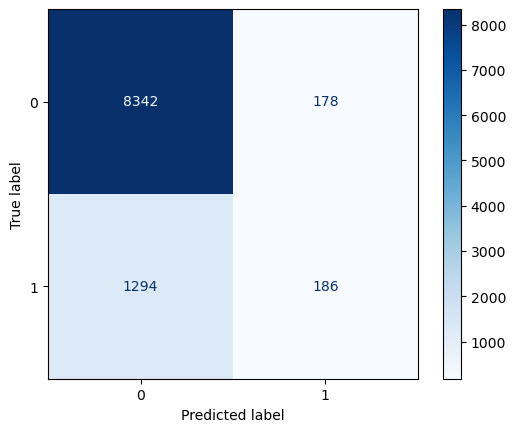

In [32]:
# Plot the confusion matrix
metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### Model understanding
To comprehend the outcomes of a model easily, one can examine the feature importances. These importances indicate the significance of a feature within the predictive model, and there are multiple techniques to calculate them. With the Random Forest classifier, we can obtain the feature importances using the built-in method in the trained model. In the Random Forest scenario, the feature importance is determined by the frequency of usage of each feature for splitting across all trees.

In [33]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
feature_importances

,index,features,importance
0,28,route_DELSYD,0.000177
1,13,trip_type_CircleTrip,0.000259
2,100,origin_destination_MELSGN Australia,0.000264
3,51,route_ICNMEL,0.000274
4,22,route_CMBSYD,0.000289
...,...,...,...
97,5,flight_day,0.075202
98,3,length_of_stay,0.086611
99,10,total_trip_duration,0.111887
100,4,flight_hour,0.119452


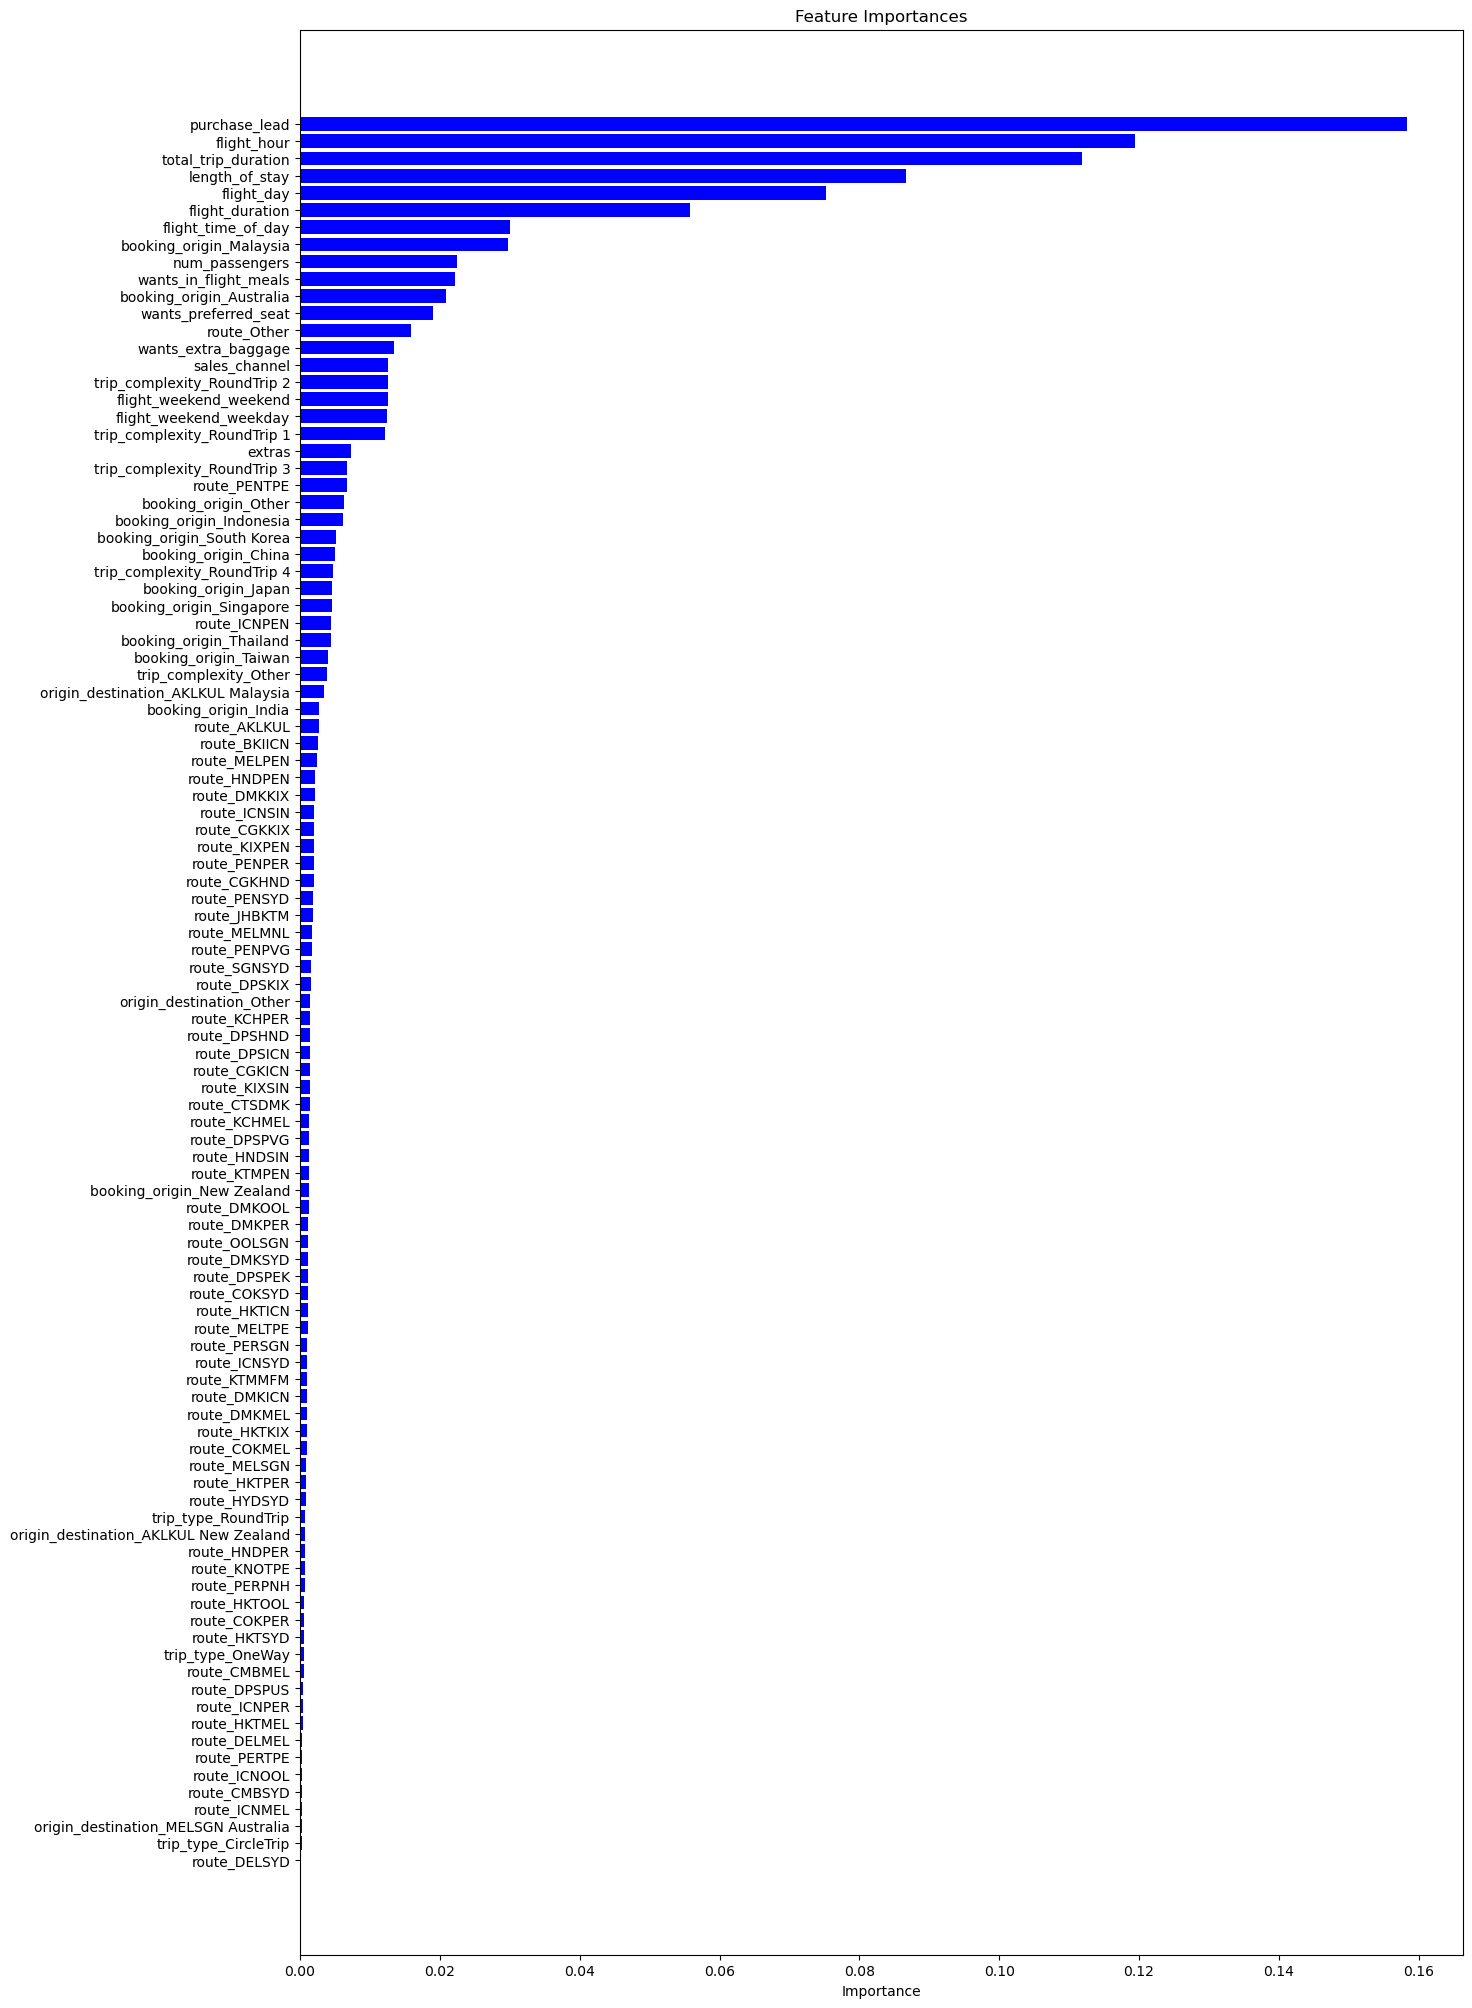

In [34]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [35]:

threshold = 0.005696  # Set the threshold for feature importance

# Get the names of the columns with feature importances above the threshold
X_important = feature_importances[feature_importances['importance'] >= threshold]['features']
X_important = X[X_important]

In [36]:
X_important_train, X_important_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Fit a model using the important features
model.fit(X_important_train, y_train)

# Predict on the test sample
prediction = model.predict(X_important_test)

# Calculate the accuracy of the model
tn, fp, fn, tp = metrics.confusion_matrix(y_test, prediction).ravel()

In [37]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, prediction) * 100} %")
print(f"Precision: {metrics.precision_score(y_test, prediction) * 100} %")
print(f"Recall: {metrics.recall_score(y_test, prediction) *100} %")
print(f"F1 score: {metrics.f1_score(y_test, prediction)*100} %")

True positives: 175
False positives: 125
True negatives: 8395
False negatives: 1305

Accuracy: 85.7 %
Precision: 58.333333333333336 %
Recall: 11.824324324324325 %
F1 score: 19.662921348314608 %


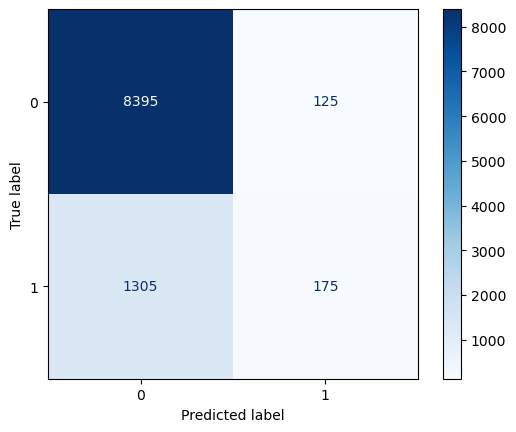

In [38]:
# Plot the confusion matrix
metrics.plot_confusion_matrix(model, X_important_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [39]:
feature_importances = pd.DataFrame({
    'features': X_important_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
feature_importances

,index,features,importance
0,4,extras,0.006406
1,3,trip_complexity_RoundTrip 3,0.006950
2,2,route_PENTPE,0.007029
3,0,booking_origin_Indonesia,0.008983
4,1,booking_origin_Other,0.009224
5,7,flight_weekend_weekend,0.011253
6,6,flight_weekend_weekday,0.011343
7,5,trip_complexity_RoundTrip 1,0.011792
8,9,sales_channel,0.011968
9,8,trip_complexity_RoundTrip 2,0.012391


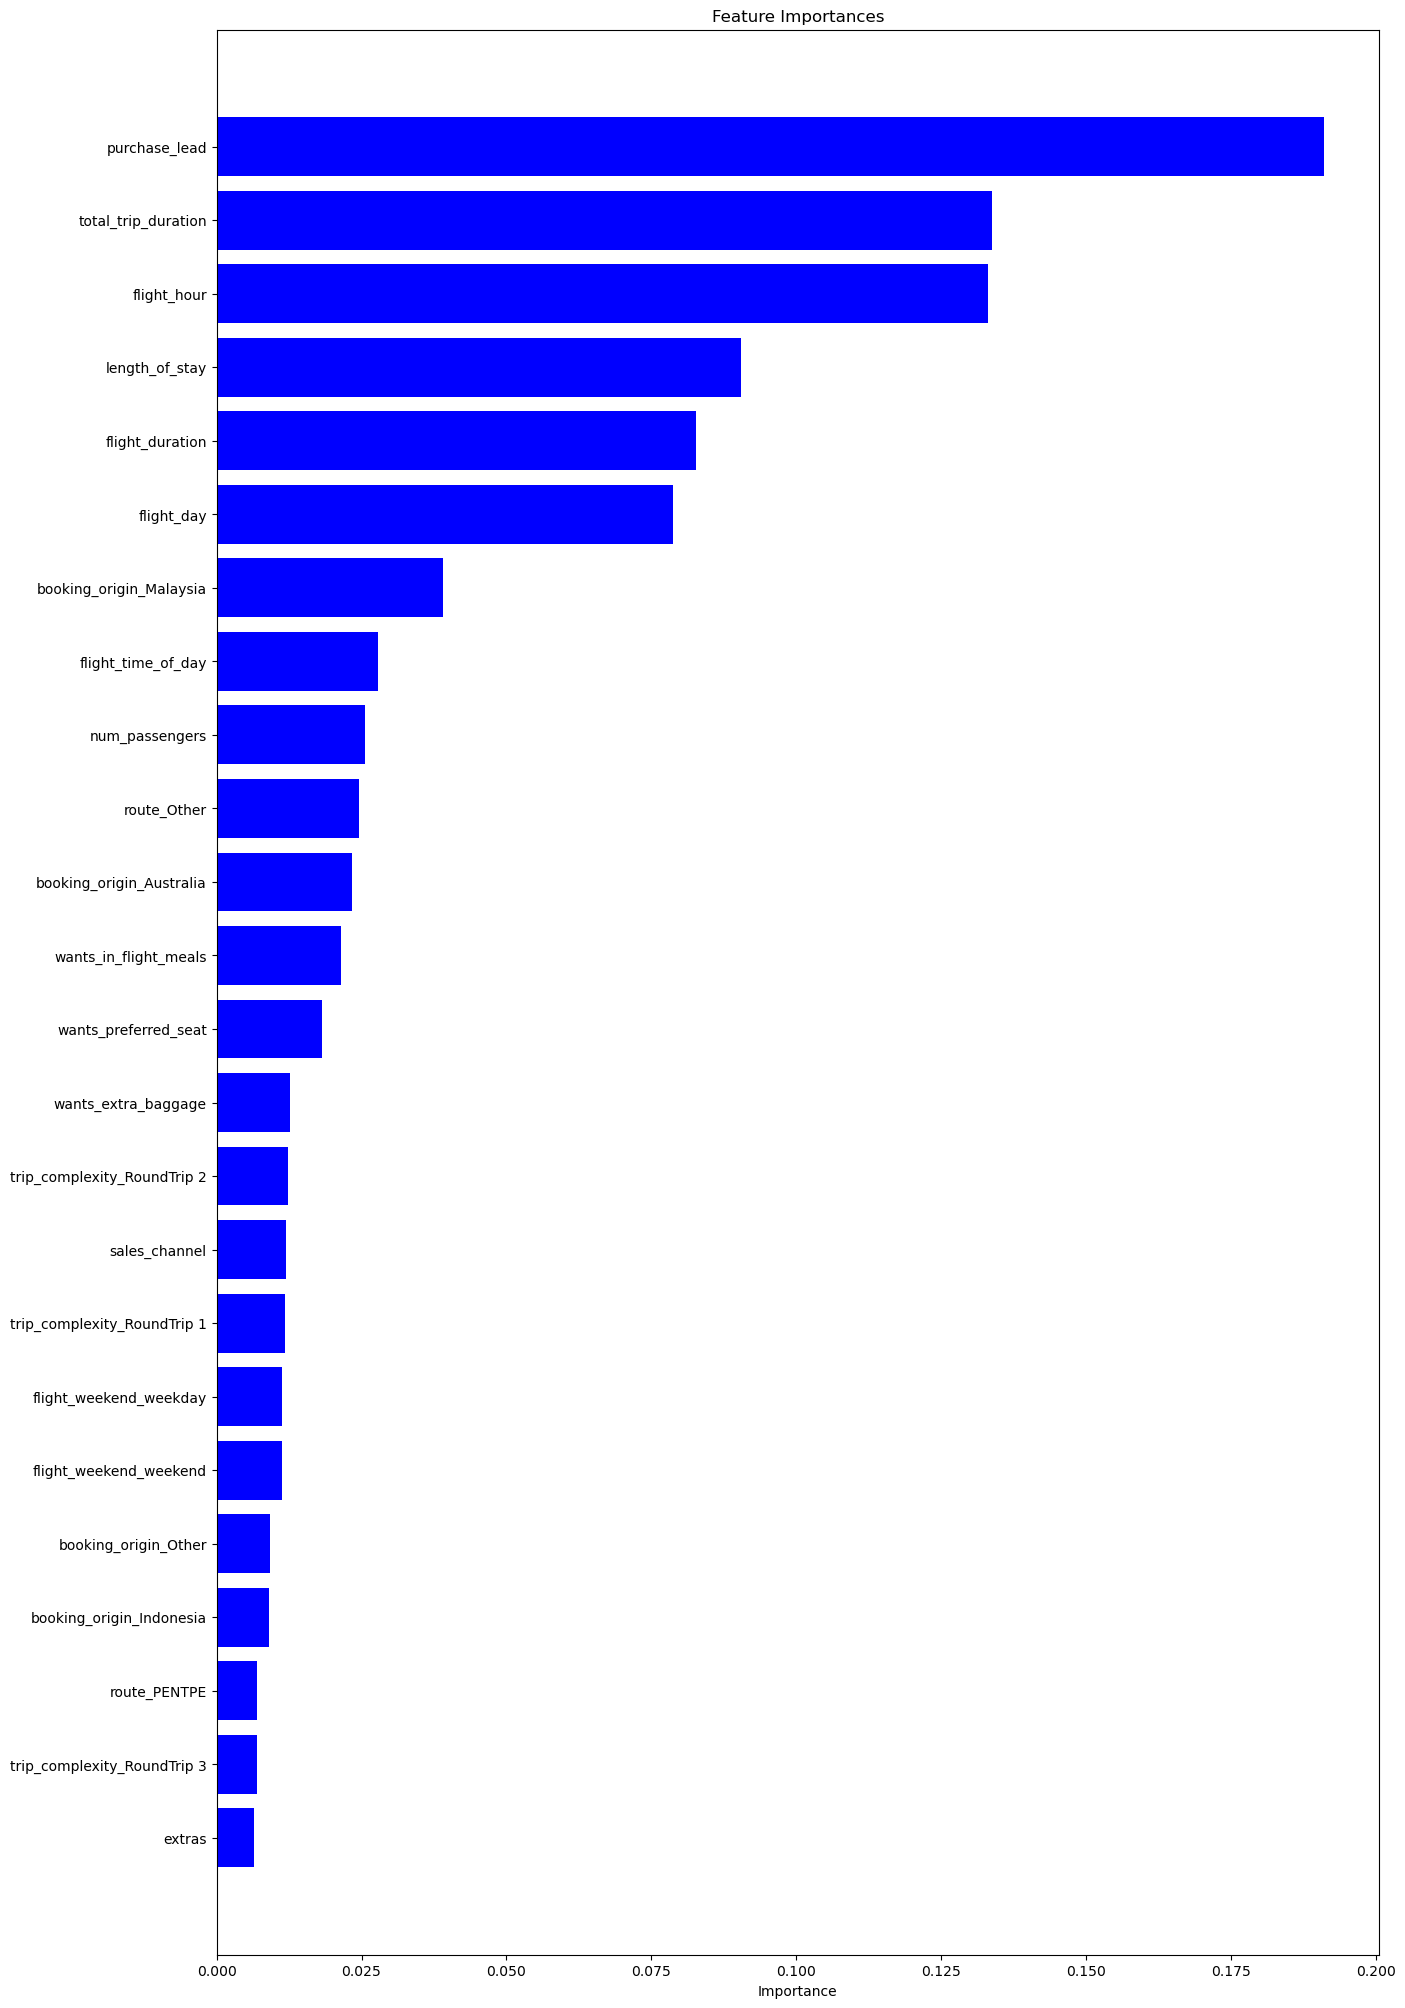

In [40]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()